# Populy
### Guía de uso en *jupyter notebook*

## Pasos previos: instalación

Populy es un paquete desarrollado en Python para la simulación de procesos evolutivos de tipo *forward evolution*.

El codigo de abajo permite instalar el paquete, para ello primero es necesario subirlo a <i>PyPi</i>, el repositorio de Python para Pip, que es su instalador. 

```
!pip install Populy
```

## Importar el paquete

Importar es el paso previo para utilizar cualquier paquete, es una forma de "cargar" el paquete instalado.
Populy contiene varios archivos, sin embargo nosotros solo importaremos uno de esos archivos

Importaremos tanto `population` como `plots`, el primero nos permite crear la población y el segundo representarla.

In [1]:
from populy.population import Population
from populy.plots import Plots

En caso de que salga un error, copiar el código de abajo y ejecutar en una celda:
```python

try:
    from populy.population import Population
except ModuleNotFoundError as e:
    import sys
    sys.path.append('populy')
finally:
    from populy.population import Population
```

## Crear una población

Se instancia un objeto de la clase Population.

Tenemos una nueva poblacion vacía a la cual le hemos llamado 'poblacion'. Esta poblacion tiene una serie de características, llamadas <b>atributos</b>, que la definen. En este caso sus valores son unos predeterminados pero se pueden cambiar pasandole el nuevo valor del atributo dentro del paréntesis tal y como se ha hecho con el tamaño (size)

In [2]:
# se crea una nueva poblacion donde se especifican caracteristicas generales de esta
poblacion = Population(size=1000,
                       freq={'A':(0.4,0.6),'B':(0.6,0.4)},	
                       fit={'AABB':0.2},
                       mu=(0.01,0.01)
                       )

Si se quiere saber más sobre los posibles parámetros que incluir se puede consultar la documentación mediante la función help

In [3]:
help(Population.__init__)

Help on function __init__ in module populy.population:

__init__(self, size=100, name='Population', ploidy=2, vida_media=55, R=0.5, mu=(0.0001, 0.0001), freq={'A': (0.5, 0.5), 'B': (0.5, 0.5)}, D=0, fit=0, sex_system='XY', rnd=False)
    Creates a new empty population object.
    
    Parameters:
        size (int): Population size. Defaults to 100.
        name (int): Population name. Defaults to 'Population'
        ploidy (int): Number of homologous chromosomes. Defaults to 2.
        R (float) : Recombination frequency [0,0.5] where 0.5 indicates
        statistic independence. Defaults to 0.5. 
        mu (tuple(float,float)): Mutation rate. Defaults to (1e-4,1e-4).
        freq (dict): loci (key) and allelic frequencies for each allele (values).
        D (float): initial linkage desequilibrium [0,0.5]. Defaults to 0. 
        fit (int,dict): fitness function applied, can take allele fitness value
        or genotype fitness value. E.g. {'A':0.8} or {'AABB':0.8}. Every other 
   

In [3]:
Population.info(poblacion)

tamaño: 1000
ploidía: 2
frecuencias alelicas iniciales: {'A': (0.4, 0.6), 'B': (0.6, 0.4)}
desequilibrio de ligamiento: 0
frecuencia de recombinacion: 0.5
tasa de mutaciones: (0.01, 0.01)
generación actual: 0
sistema de determinación del sexo: XY
tipo de seleccion: {'AABB': 0.2}


### Generar individuos en la población

Una vez creada la población se puede operar sobre ella. Para hacerlo se requiere de una estructura llamada método, que se sigue la siguiente notación:

`objeto.metodo()`

Siendo poblacion el objeto en cuestión.
Como la población que hemos creado previamente estaba vacía es necesario introducir unos individuos en ella mediante la siguiente linea de código:

In [4]:
poblacion.initIndividuals()

se han generado un total de 1000 individuos de la poblacion


Nuestra población tiene muchas más funciones, como por ejemplo `printIndividuals` que muestra por pantalla información de algunos individuos que se encuentran en la población.

In [5]:
# show=elige el número de individuos que se muestran
poblacion.printIndividuals(show=5)

ide	sex	sex_chromosome	chromosome
g0.ID-0	Female	XX	{'c1': 'Ab', 'c2': 'ab'}
g0.ID-1	Female	XX	{'c1': 'AB', 'c2': 'AB'}
g0.ID-2	Female	XX	{'c1': 'aB', 'c2': 'Ab'}
g0.ID-3	Female	XX	{'c1': 'ab', 'c2': 'AB'}
g0.ID-4	Male	XY	{'c1': 'aB', 'c2': 'ab'}


## Evolución

Al igual que se ha hecho con los otros métodos `initIndividuals` y `printIndividuals` es necesario llamar ahora al método que permite hacer que la población evolucione, es decir, que vayan sucediendo nuevas generaciones.

In [6]:
poblacion.evolvePop(gens=100,
                    every=10,
                    printInfo=False)

10.0% completado...
20.0% completado...
30.0% completado...
40.0% completado...
50.0% completado...
60.0% completado...
70.0% completado...
80.0% completado...
90.0% completado...
¡Evolucion completada!


El algoritmo que el método evolvePop sigue es el siguiente:

1. Se escogen 2 individuos de forma aleatoria de nuestra población
2. Se comprueban una serie de parámetros (si ambos son de sexos diferentes, por ejemplo)
3. Si se cumplen estos parámetros se genera un nuevo individuo (recordemos que individuo es una forma de referirse a un objeto de la clase individuo)
4. Dentro de cada individuo se genenera su genoma (sus cromosomas homólogos ya que se trabaja con un único cromosoma)
5. Se realizan algunas operaciones más, como la posibilidad de una mutación o la recombinación
6. Se aplica (o no) una función de selección que vendrá dada por su genoma, si sobrevive se añadirá a la siguiente generación (pasará el filtro)
8. Repetir el proceso hasta que tengamos una nueva población del mismo tamaño
9. Repetir el proceso hasta llegar al número de generaciones especificada

## Extraer información
Una vez completada la evolucion podemos acceder a los atributos y/o metodos de nuestra poblacion para ver si ha cambiado, o que informacion se ha ido recopilando durante la evolucion.

La forma más sencilla de obtener un resumen de los datos es utilizando el método `getDataFrame` que permite obtener una tabla (dataframe) donde se encuentra el resultado de la población.

In [7]:
# obtenemos la evolución de las frecuencias alélicas para el alelo mayor
poblacion.getDataFrame("alleles")

,A,B
gen.0,0.382500,0.592500
gen.10,0.225774,0.483516
gen.20,0.227273,0.369630
gen.30,0.186314,0.334665
gen.40,0.136364,0.307193
gen.50,0.125375,0.274226
gen.60,0.116883,0.297702
gen.70,0.081419,0.282218
gen.80,0.080420,0.244256
gen.90,0.051449,0.249750


Se observa una disminución en las frecuencias alélicas de la población ya que las iniciales se habían establecido en:
```python 
{'A':(0.5,0.5),'B':(0.5,0.5)}
```

## Representar gráficamente la evolución

La forma más sencilla de ver la evolución de una población es estudiar su genoma, para nuestro ejemplo se ha especificado una población diploide con 2 locus (o genes) A y B. Podemos ver cómo ha ido cambiando la frecuencia del alelo mayor, así como de las frecuencias gaméticas.
A partir de aquí se puede visualizar el efecto de la fijación de un alelo u otro, el efecto de la selección, de la mutación o de la frecuencia de recombinación, que al fin y al cabo es un indicador de la proximidad de los dos locus.

Para ello se utilizará el módulo plots de la siguiente forma:

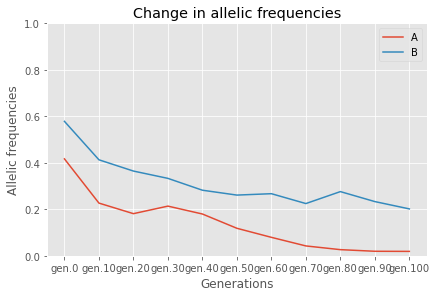

In [7]:
Plots.alleles(poblacion)

Si lo que se busca es obtener un resultado conjunto del cambio en los alelos, gametos, sexos y mutaciones se puede utilizar el siguiente método

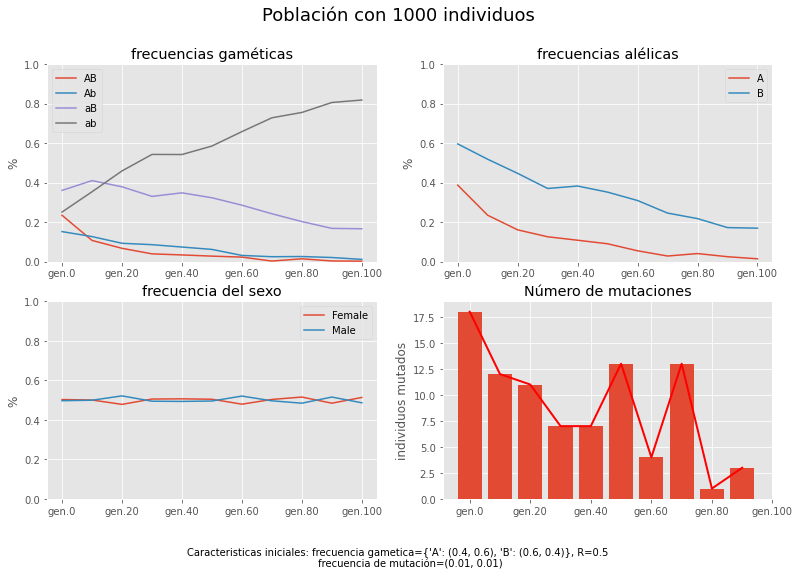

In [10]:
# obtiene un resumen del cambio en la frecuencia alelica y gametica
poblacion.plotAll()

## Extra
### Concatenacion de varias poblaciones
Al metodo initIndividuals podemos pasarle una población ya iniciada siempre y cuando tenga la misma estructura genética que la población que estamos construyendo (ej: no se puede pasar individuos con un solo locus 'A' cuando queremos que la poblacion tenga dos locus 'A','B')


Se han tomado 200 individuos de la poblacion
10.0% completado...
20.0% completado...
30.0% completado...
40.0% completado...
50.0% completado...
60.0% completado...
70.0% completado...
80.0% completado...
90.0% completado...
¡Evolucion completada!


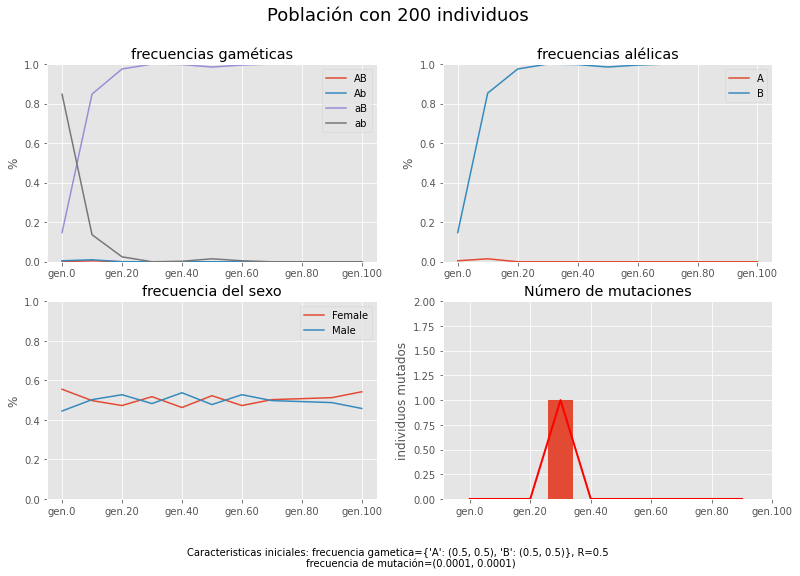

In [11]:
# Creamos la nueva poblacion vacia
newPop = Population(size=200,fit={'aabb':0})

# Esta vez la llenamos de individuos ya existentes
newPop.initIndividuals(pop = poblacion)

newPop.evolvePop(gens=100,every=10)

newPop.plotAll()

Esto permite obtener resultados muy interesantes, de aqui se puede estudiar tanto el efecto fundador:<br>
Una pequeña parte de la poblacion ya existente de `humans` "migran" a una nueva localizacion. Trayendo consigo desigualdades genéticas debidas al reducido número de individuos, esto sumado a una nueva presión selectiva, donde el genotipo antes beneficiado ('aabb') ahora se selecciona fuertemente en contra.
***

## Simulación de múltiples poblaciones

Para trabajar con múltiples poblaciones idénticas se debe importar el módulo superpop:

In [12]:
from populy.superpop import Superpop

# permite eliminar el output por terminal
from IPython.display import clear_output

In [13]:
# creamos el objeto
sPop = Superpop(popsize=100,n=10)
# Iniciamos todas las poblaciones 
sPop.startPops(gens=100)
clear_output()

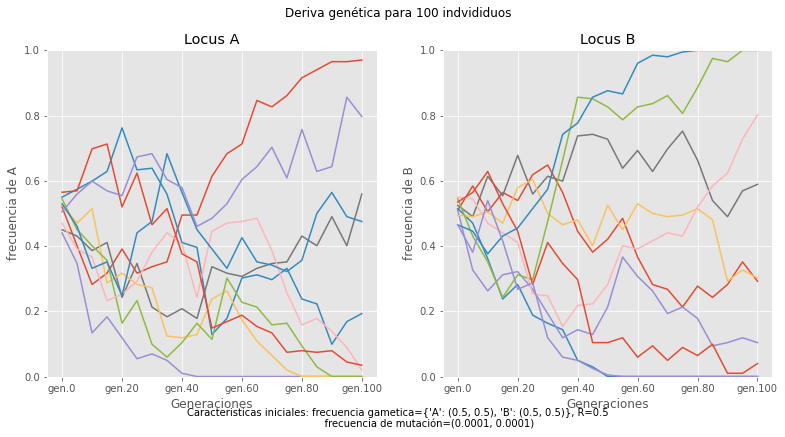

In [14]:
sPop.plotPops()

## Interpretación de resultados

Lo primero que podemos observar es que tanto el locus A como el B se han fijado en la población, esto se debe (principalmente) al efecto de la deriva genética, un fenómeno que aparece en poblaciones de pequeño tamaño como son las nuestras.
Lo segundo es que parece que se fijan con más frecuencia los alelos mayores, esto se puede ver mejor mediante el siguiente código :

Quizá es demasiado complejo?

In [15]:
# Lista de poblaciones
pops = sPop.sPop
# para ver el tamaño de la lista, es decir, el numero de subpoblaciones...
size = len(pops)
print(size)

# para ver las frecuencias alelicas de la ultima generacion recorremos la lista
fA = 0
fB = 0
print(f'Frecuencias alelicas en la ultima generacion {pops[0].gen}')
for i,poblacion in enumerate(pops):
    frecuencias_alelicas = poblacion.alleleFreq()
    print('Poblacion 0: ',frecuencias_alelicas)
    # contamos cuantos alelos se han fijado
    if frecuencias_alelicas['A'] == 1:
        fA +=1
    if frecuencias_alelicas['B'] == 1:
        fB +=1
# calculamos el porcentaje sobre el total
fA = (fA/size)*100
fB = (fB/size)*100

print(f'Frecuencia de fijación de A: {fA}',
      f'Frecuencia de fijación de B: {fB}',sep='\n')

10
Frecuencias alelicas en la ultima generacion 100
Poblacion 0:  {'A': 0.9702970297029703, 'B': 0.2920792079207921}
Poblacion 0:  {'A': 0.19306930693069307, 'B': 0.0}
Poblacion 0:  {'A': 0.0, 'B': 0.10396039603960396}
Poblacion 0:  {'A': 0.5594059405940595, 'B': 0.5891089108910892}
Poblacion 0:  {'A': 0.0, 'B': 0.30198019801980197}
Poblacion 0:  {'A': 0.0, 'B': 1.0}
Poblacion 0:  {'A': 0.019801980198019802, 'B': 0.801980198019802}
Poblacion 0:  {'A': 0.03465346534653465, 'B': 0.039603960396039604}
Poblacion 0:  {'A': 0.4752475247524752, 'B': 1.0}
Poblacion 0:  {'A': 0.7970297029702971, 'B': 0.0}
Frecuencia de fijación de A: 0.0
Frecuencia de fijación de B: 20.0


Vistas las frecuencias de fijacion para cada alelo, si tenemos claro de qué estructura tenían las poblaciones podemos averiguar si es efecto de la deriva o si existe algún tipo de selección que favorezca a uno u otro alelo para cada loci.
